<a href="https://colab.research.google.com/github/hyeon9698/Donghyeon_Cho/blob/main/MLOps/Week_1/deep_learning_fundamentals_part1_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.10


In [3]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [4]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [5]:
!nvidia-smi

Sun Mar 28 14:35:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import numpy as np
X = np.zeros((3,2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [8]:
X.shape, X.dtype

((3, 2), dtype('float64'))

In [9]:
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [10]:
X[:,0] = 5
X

array([[5., 1.],
       [5., 0.],
       [5., 0.]])

In [11]:
X = np.array([
    [1,2],
    [3,4],
    [5,6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [12]:
x = np.array([10, 20])
print(X.shape, x.shape)
X+x

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [14]:
x.shape

(2,)

In [15]:
X*x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [23]:
x = np.array([[10, 20],]).T
print(X)
print(x)

[[1 2]
 [3 4]
 [5 6]]
[[10]
 [20]]


In [24]:
X @ x

array([[ 50],
       [110],
       [170]])

Indexing

In [26]:
X = np.random.rand(3, 2)
X

array([[0.6012342 , 0.68027734],
       [0.64394184, 0.71873203],
       [0.95469188, 0.08269085]])

In [29]:
X[X>0.5] = 55
X

array([[55.        , 55.        ],
       [55.        , 55.        ],
       [55.        ,  0.08269085]])

<Figure size 432x288 with 0 Axes>

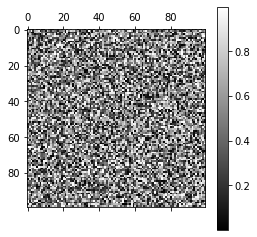

In [32]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')
X = np.random.rand(100,100)
plt.matshow(X)
plt.colorbar()

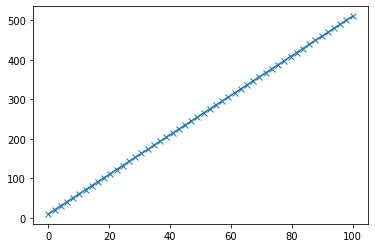

In [35]:
x = np.linspace(0,100)
y = x*5 + 10
plt.plot(x, y, 'x-')

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


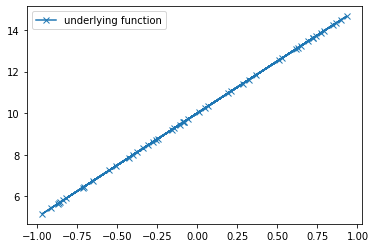

In [50]:
n = 50
d = 1
x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

Basic prediction function: Linear

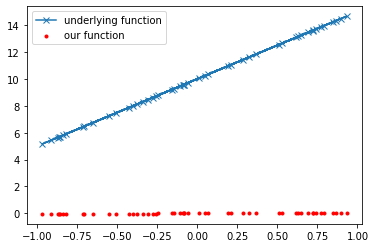

In [70]:
class Linear:
    def __init__(self, num_input, num_output=1):
        self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
        self.bias = np.zeros((1))
    def __call__(self, x):
        return x @ self.weights + self.bias
linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

Basic loss function: MSE

In [72]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_ture = y_true
        return ((y_true - y_pred) ** 2).mean()
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Add back propagation

In [73]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_ture = y_true
        return ((y_true - y_pred) ** 2).mean()
    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient
class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) - 0.5
        self.bias = np.random.randn(1) - 0.5
    def __call__(self, x):
        # self.x = x
        # output = x @ self.weights + self.bias
        return self.x @ self.weights + self.bias
        # return output
    # y = w*x + b
    # dy/dx = w
    # dy/dw = x
    # dy/db = 1
    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum()
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient